# Лабораторная работа 4

Деревья решений

Выполнил: 6306,Бамбурова Мария Владимировна

0.  Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

**Набор данных:**  Набор данных о банковском обороте



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
dataset_4t='https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling'

In [ ]:
data_dirrr ='.\bank-customer-churn-modeling'

In [ ]:
od.download(dataset_4t)

In [ ]:
import os

In [ ]:
os.listdir(data_dirrr)

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**ИНФОРМАЦИЯ ПО ДАТАСЕТУ**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**ЗАДАНИЕ 1**

1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью `pd.factorize` / `pd.get_dummies`

1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета `KNeighborsClassifier` (без использования конвееров)

1.2. То же самое и использованием `sklearn.pipeline.Pipeline`

1.3. С помощью `GridSearchCV` произвести подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`) и выведите значение гиперпараметра и метрику для наилучшей модели

Рассмотрим распределение по возрасту в данном наборе данных

C:\Users\BamMa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


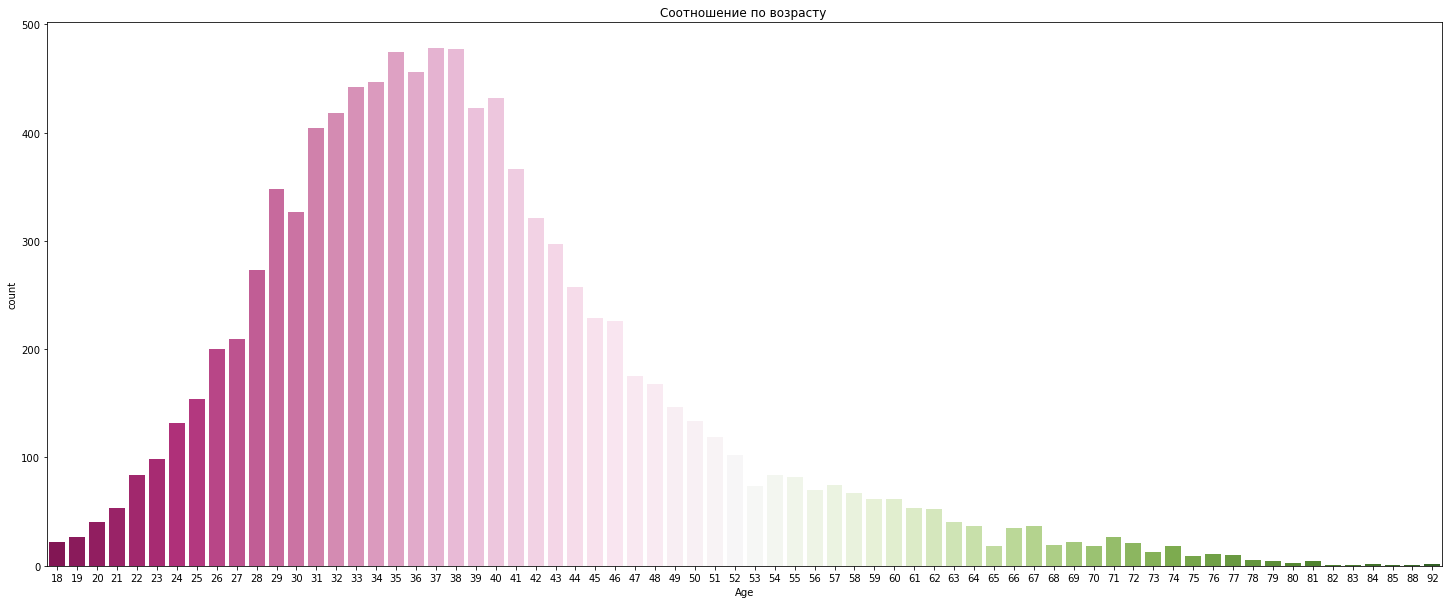

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(df["Age"], palette="PiYG")
ax.set(title="Соотношение по возрасту ")
plt.show()

**1.0**

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Преобразовываем категориальные признаки в бинарные

In [ ]:
df=pd.get_dummies(df,columns=['Surname','CreditScore','Geography','Gender'])

In [ ]:
df

,RowNumber,CustomerId,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,CreditScore_846,CreditScore_847,CreditScore_848,CreditScore_849,CreditScore_850,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,42,2,0.00,1,1,1,101348.88,1,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,41,1,83807.86,1,0,1,112542.58,0,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,42,8,159660.80,3,1,0,113931.57,1,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,39,1,0.00,2,0,0,93826.63,0,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,43,2,125510.82,1,1,1,79084.10,0,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,39,5,0.00,2,1,0,96270.64,0,...,0,0,0,0,0,1,0,0,0,1
9996,9997,15569892,35,10,57369.61,1,1,1,101699.77,0,...,0,0,0,0,0,1,0,0,0,1
9997,9998,15584532,36,7,0.00,1,0,1,42085.58,1,...,0,0,0,0,0,1,0,0,1,0
9998,9999,15682355,42,3,75075.31,2,1,0,92888.52,1,...,0,0,0,0,0,0,1,0,0,1


**1.1**

In [ ]:
y1 = df['HasCrCard'].astype('category')
y1 = y1.cat.codes
df.pop('HasCrCard')

0       1
1       0
2       1
3       0
4       1
       ..
9995    1
9996    1
9997    0
9998    1
9999    1
Name: HasCrCard, Length: 10000, dtype: int64

Нормализуем значения признаков

In [ ]:
scaler = StandardScaler()
scaler2 = scaler.fit_transform(df)

Делим на обучающую и тестовую выборки

In [ ]:
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(scaler2, y1, test_size=0.33, random_state=0)

KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model.fit(Xtrain1, Ytrain1)
y_pred1 = model.predict(Xtest1)

In [ ]:
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.6551515151515152


**1.2**

С использование pipeline

In [ ]:
model2 = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
model2.fit(Xtrain1,Ytrain1)
y_pred1 = model2.predict(Xtest1)

In [ ]:
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.656969696969697


**1.3**

 Производим подбор оптимальных гиперпараметров

In [ ]:
parameters = {'n_neighbors': range(2, 30)}
model3 = GridSearchCV(KNeighborsClassifier(), parameters)
model3.fit(Xtrain1, Ytrain1)
model3.best_params_

{'n_neighbors': 27}

In [ ]:
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(Xtrain1,Ytrain1)
y_pred1 = model3.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.6551515151515152


**ЗАДАНИЕ 2**


2.1. Продемонстрировать работу `DecisionTreeClassifier`, посчитать метрики качества на отложенной выборке

2.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать `max_depth`, `max_features` и может быть что-то ещё)

2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности


**2.1**

In [ ]:
model4 = DecisionTreeClassifier()
model4.fit(Xtrain1, Ytrain1)
y_pred1 = model4.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.6081818181818182


**2.2**

In [ ]:
 parameters = {'max_depth': range(2, 30),'max_features':('auto', 'sqrt', 'log2'),
             'splitter':('best', 'random')}
model5 = GridSearchCV(model4, parameters)
model5.fit(Xtrain1, Ytrain1)
y_pred1 = model5.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))
g=model5.best_params_
g

Accuracy:  0.6972727272727273


{'max_depth': 2, 'max_features': 'sqrt', 'splitter': 'best'}

**2.3**

In [ ]:
 Ищем наиболее важные

In [ ]:
im = np.vstack([importances, df.columns])
s={}
for i in range(0,im.shape[1]):
    s[im[1,i]]=im[0,i]
s

{'RowNumber': 0.0523802301332015,
 'CustomerId': 0.051071622480592015,
 'Age': 0.0665226359529441,
 'Tenure': 0.03270336783922557,
 'Balance': 0.03892821305616256,
 'NumOfProducts': 0.012504952019970131,
 'IsActiveMember': 0.009455796134762887,
 'EstimatedSalary': 0.053586769986875275,
 'Exited': 0.014244945748062397,
 'Surname_Abazu': 9.66123022091757e-05,
 'Surname_Abbie': 0.0,
 'Surname_Abbott': 9.977999949134935e-05,
 'Surname_Abdullah': 0.0,
 'Surname_Abdulov': 0.0,
 'Surname_Abel': 0.0,
 'Surname_Abernathy': 0.0,
 'Surname_Abramov': 0.0,
 'Surname_Abramova': 0.0,
 'Surname_Abramovich': 9.588326146567717e-05,
 'Surname_Abramowitz': 0.00010193334932586212,
 'Surname_Abrego': 5.314880630824049e-05,
 'Surname_Abron': 7.737601985291116e-05,
 'Surname_Achebe': 6.348303524138184e-05,
 'Surname_Adams': 0.00040469203227564327,
 'Surname_Adamson': 0.000184002769552132,
 'Surname_Afamefula': 0.00010427714088400484,
 'Surname_Afamefuna': 5.3593255501982324e-05,
 'Surname_Afanasyev': 1.631327

Наиболее важные

In [ ]:
sorted(s,reverse=True,key=s.get)[0:3]

['Age', 'EstimatedSalary', 'RowNumber']

**ЗАДАНИЕ 3**

3.1. Продемонстрировать работу случайного леса `RandomForestClassifier`

3.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики


**3.1**

In [ ]:
model6 = RandomForestClassifier()
model6.fit(Xtrain1, Ytrain1)
y_pred1 = model.predict(Xtest1)

In [ ]:
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.6551515151515152


**3.2**

In [ ]:
params = {
    "criterion": ("gini", "entropy"),
    "n_estimators": range(2, 30)
}
model7 = GridSearchCV(RandomForestClassifier(), params)
model7.fit(Xtrain1, Ytrain1)
print(model7.best_estimator_)

RandomForestClassifier(criterion='entropy', n_estimators=27)


In [ ]:
y_pred1 = model7.predict(Xtest1)
print("Accuracy: ",accuracy_score(Ytest1, y_pred1))

Accuracy:  0.546969696969697


**4**

4. Сделать выводы. Какой классификатор и с камими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выборке.

In [ ]:
Выводы:

Наибольшую точность (Accuracy=0.6972727272727273) продемонстрировал классификатор DecisionTreeClassifier с параметрами  max_depth, max_features
